<a href="https://colab.research.google.com/github/hewp84/tinyml/blob/main/Simple_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table><tr>
    <td  style="background-color:#ffffff;text-align:left;"><a href="http://www.purdue.edu" target="_blank"><img src="https://github.com/hewp84/tinyml/blob/main/img/Logo-Purdue-University.png?raw=1" width="30%" align="left"></a></td>
    <td style="background-color:#ffffff;">&nbsp;</td>
    <td style="background-color:#ffffff;vertical-align:text-middle;text-align:right;">
        <table><tr style="background-color:white;">
            <td><h1 style="font-size:10vw">TinyML for Manufacturing</h1></td>
            <td>
        </tr></table>
    </td>     
</tr></table>

#Creating a Simple Model using Deep learning networks
In this notebook, we will walk through the process of creating a model from raw data to the refinement of a trained predictive model.

Deep learning networks learn to model patterns in underlying data. Here, we're going to train a network to model data generated by a several mathematical functions. This will result in a model that can take a value, x, and predict its ordinate value in y.

##Learning goals
You will be able to identify the ML worflow steps towards the development of a model to make predictions.

You will be able to develop and refine a model from a noisy function data series.


##1. Preparation

### Setup Environment

The first step involves installing and importing the dependencies we will be using to train the mode.

In [ ]:
# TensorFlow is an open source machine learning library
import tensorflow as tf

# Keras is TensorFlow's high-level API for deep learning
from tensorflow import keras
# Numpy is a math library
import numpy as np
# Pandas is a data manipulation library 
import pandas as pd
# Matplotlib is a graphing library
import matplotlib.pyplot as plt
# Math is Python's math library
import math
#io is a library to import datasets
import io


### Dataset
Now we need to import or generate the data that will be used to train our model.

For our first example, we will import a csv file containing data with noise from a linear function.


In [ ]:
# Copying raw data from github dataset file
url = 'https://raw.githubusercontent.com/hewp84/tinyml/main/datasets/neg_line.csv'
#df is the variable where the data is stored
df = pd.read_csv(url)
#If you want to verify the content of the dataset, just uncomment the line beneath
#df

In [ ]:
#Randomizes the dataset
df = df.sample(frac = 1)
#Counts the range of rows from the dataset
sample = len(df.index)
#Stores in simple variables the column lists from the dataset
x_values = df['x']
y_values_0 = df['y']
y_values = df['ys']

Before jumping into the model training, lets visualize the clean behavior of the original function.

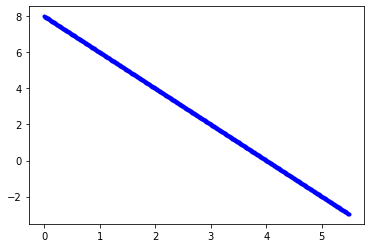

In [ ]:
# Plot our data. The 'b.' argument tells the library to print blue dots.
plt.plot(x_values, y_values_0, 'b.')
plt.show()

In [6]:
#@title What kinda of graph do you visualize?

Text = '' #@param {type:"string"}

print(Text)


Now, lets visualize the graph with noise. The noise represents variations due to real conditions.

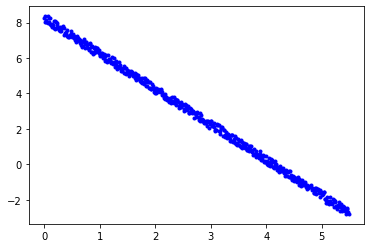

In [ ]:
# Plot our data. The 'b.' argument tells the library to print blue dots.
plt.plot(x_values, y_values, 'b.')
plt.show()

In [ ]:
#@title What difference do you notice between this graph and the previous one?

text = 'value' #@param {type:"string"}

print(text)


###Split the data
We now have a noisy dataset that approximates real world data. We'll be using this to train our model.

To evaluate the accuracy of the model we train, we'll need to compare its predictions to real data and check how well they match up. This evaluation happens during training (where it is referred to as validation) and after training (referred to as testing) It's important in both cases that we use fresh data that was not already used to train the model.

The data is split as follows:
  1. Training: 60%
  2. Validation: 20%
  3. Testing: 20% 

The following code will split our data and then plots each set as a different color:

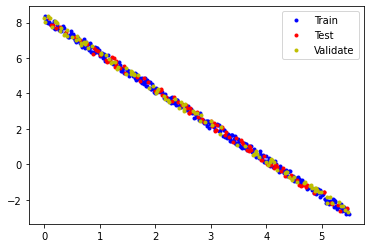

In [ ]:
# We'll use 60% of our data for training and 20% for testing. The remaining 20%
# will be used for validation. Calculate the indices of each section.
TRAIN_SPLIT =  int(0.6 * sample)
TEST_SPLIT = int(0.2 * sample + TRAIN_SPLIT)

# Use np.split to chop our data into three parts.
# The second argument to np.split is an array of indices where the data will be
# split. We provide two indices, so the data will be divided into three chunks.
x_train, x_test, x_validate = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

# Double check that our splits add up correctly
assert (x_train.size + x_validate.size + x_test.size) ==  sample

# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.legend()
plt.show()


##2. Developing the model

### Design the Model
We're going to build a simple neural network model that will take an input value (x value) and use it to predict a numeric output value (y value). This type of problem is called a _regression_. It will use _layers_ of _neurons_ to attempt to learn any patterns underlying the training data, so it can make predictions.

To begin with, we'll define two layers. The first layer takes a single input (our `x` value) and runs it through 8 neurons. Based on this input, each neuron will become _activated_ to a certain degree based on its internal state (its _weight_ and _bias_ values). A neuron's degree of activation is expressed as a number. 

The activation numbers from our first layer will be fed as inputs to our second layer, which is a single neuron. It will apply its own weights and bias to these inputs and calculate its own activation, which will be output as our `y` value.


In [ ]:
# We'll use Keras to create a simple model architecture
model_1 = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 8 "neurons". The
# neurons decide whether to activate based on the 'relu' activation function.
model_1.add(keras.layers.Dense(8, activation='relu', input_shape=(1,)))

# Final layer is a single neuron, since we want to output a single value
model_1.add(keras.layers.Dense(1))

# Compile the model using the standard 'adam' optimizer and the mean squared error or 'mse' loss function for regression.
model_1.compile(optimizer='adam', loss='mse', metrics=['mae'])

### Train the Model
Once we've defined the model, we can use our data to _train_ it. Training involves passing an `x` value into the neural network, checking how far the network's output deviates from the expected `y` value, and adjusting the neurons' weights and biases so that the output is more likely to be correct the next time.

Training runs this process on the full dataset multiple times, and each full run-through is known as an _epoch_. The number of epochs to run during training is a parameter we can set.

During each epoch, data is run through the network in multiple _batches_. Each batch, several pieces of data are passed into the network, producing output values. These outputs' correctness is measured in aggregate and the network's weights and biases are adjusted accordingly, once per batch. The _batch size_ is also a parameter we can set.

The code in the following cell uses the `x` and `y` values from our training data to train the model. It runs for 60 _epochs_, with 64 pieces of data in each _batch_. We also pass in some data for _validation_. As you will see when you run the cell, training can take a while to complete:

In [ ]:
# Train the model on our training data while validating on our validation set
history_1 = model_1.fit(x_train, y_train, epochs=60, batch_size=64,
                        validation_data=(x_validate, y_validate))

Epoch 1/60
6/6 [==============================] - 1s 30ms/step - loss: 19.4439 - mae: 3.6378 - val_loss: 21.6966 - val_mae: 3.7691
Epoch 2/60
6/6 [==============================] - 0s 6ms/step - loss: 19.2118 - mae: 3.6117 - val_loss: 21.4815 - val_mae: 3.7492
Epoch 3/60
6/6 [==============================] - 0s 6ms/step - loss: 18.9901 - mae: 3.5867 - val_loss: 21.2738 - val_mae: 3.7312
Epoch 4/60
6/6 [==============================] - 0s 7ms/step - loss: 18.7763 - mae: 3.5632 - val_loss: 21.0749 - val_mae: 3.7149
Epoch 5/60
6/6 [==============================] - 0s 6ms/step - loss: 18.5650 - mae: 3.5403 - val_loss: 20.8828 - val_mae: 3.7002
Epoch 6/60
6/6 [==============================] - 0s 7ms/step - loss: 18.3668 - mae: 3.5207 - val_loss: 20.6947 - val_mae: 3.6865
Epoch 7/60
6/6 [==============================] - 0s 7ms/step - loss: 18.1678 - mae: 3.5006 - val_loss: 20.5153 - val_mae: 3.6730
Epoch 8/60
6/6 [==============================] - 0s 7ms/step - loss: 17.9806 - mae: 3.48

###Check the Metrics
**1. Loss (or Mean Squared Error)**

During training, the model's performance is constantly being measured against both our training data and the validation data that we set aside earlier. Training produces a log of data that tells us how the model's performance changed over the course of the training process.

The following cells will display some of that data in a graphical form:

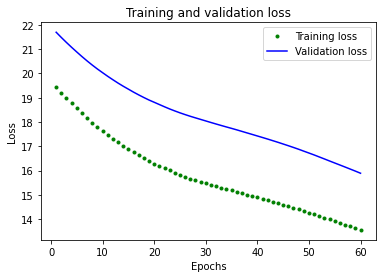

In [ ]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
train_loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [7]:
#@title What does the loss function graph suggests?

text = '' #@param {type:"string"}

print(text)


The graph shows the _loss_ (or the difference between the model's predictions and the actual data) for each epoch. There are several ways to calculate loss, and the method we have used is _mean squared error_. There is a distinct loss value given for the training and the validation data.

As we can see, there is a big gap between the loss and validation at least through the firts 60 epochs. This means that the model requires more epochs to refine and reduce its loss. The goal is to bring the loss as close to zero as possible to refine the model.

Lets try to refine the model by increasing the epochs by 10 times (500 epochs).

In [ ]:
# Train the model on our training data while validating on our validation set
history_1 = model_1.fit(x_train, y_train, epochs=600, batch_size=64,
                        validation_data=(x_validate, y_validate))

Epoch 1/600
6/6 [==============================] - 0s 13ms/step - loss: 13.4833 - mae: 3.0699 - val_loss: 15.8050 - val_mae: 3.4131
Epoch 2/600
6/6 [==============================] - 0s 6ms/step - loss: 13.4058 - mae: 3.0615 - val_loss: 15.7180 - val_mae: 3.4036
Epoch 3/600
6/6 [==============================] - 0s 6ms/step - loss: 13.3299 - mae: 3.0525 - val_loss: 15.6282 - val_mae: 3.3927
Epoch 4/600
6/6 [==============================] - 0s 6ms/step - loss: 13.2523 - mae: 3.0428 - val_loss: 15.5358 - val_mae: 3.3805
Epoch 5/600
6/6 [==============================] - 0s 6ms/step - loss: 13.1755 - mae: 3.0330 - val_loss: 15.4424 - val_mae: 3.3679
Epoch 6/600
6/6 [==============================] - 0s 7ms/step - loss: 13.0954 - mae: 3.0231 - val_loss: 15.3491 - val_mae: 3.3574
Epoch 7/600
6/6 [==============================] - 0s 6ms/step - loss: 13.0119 - mae: 3.0132 - val_loss: 15.2502 - val_mae: 3.3460
Epoch 8/600
6/6 [==============================] - 0s 6ms/step - loss: 12.9257 - m

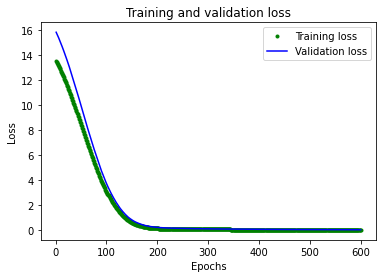

In [ ]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
train_loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
#@title How many epochs would you train a well-fitted model?

text = '' #@param {type:"string"}

print(text)


Our goal is to stop training when either the model is no longer improving, or when the training loss is less than the validation loss, which would mean that the model has learned to predict the training data so well that it can no longer generalize to new data.

To make the flatter part of the graph more readable, let's skip the first 150 epochs:

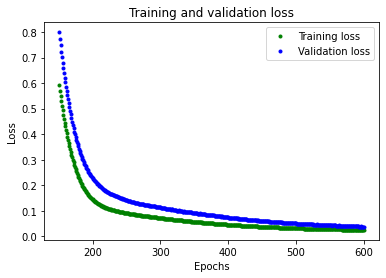

In [ ]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 150

plt.plot(epochs[SKIP:], train_loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

From the plot, we can see that loss continues to reduce until around 300 epochs, at which point it is mostly stable. This means that there's no need to train our network beyond 300 epochs.

However, we can also see that the lowest loss value is still around 0.0249. This means that our network's predictions are off by an average of ~2.49%. In addition, the validation loss values jump around a lot, and is sometimes even higher.

**2. Mean Absolute Error**

To gain more insight into our model's performance we can plot some more data. This time, we'll plot the _mean absolute error_, which is another way of measuring how far the network's predictions are from the actual numbers:

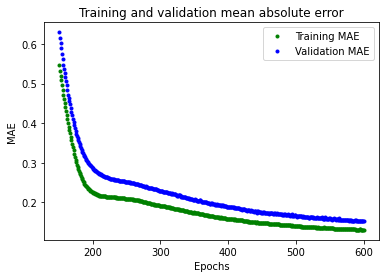

In [ ]:
plt.clf()

# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
train_mae = history_1.history['mae']
val_mae = history_1.history['val_mae']

plt.plot(epochs[SKIP:], train_mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

This graph of _mean absolute error_ supports what the loss function graph is telling us. The model seems to be able to predict values based on the data we input. The mean absolute error values seem to be in an acceptable interval, ~15%, which means prediction might go  15% off. Considering is a linear function, the numbers seem acceptable. Lets proceed to graph and compare visually.

**3. Actual vs Predicted Outputs**

To get more insight into what is happening, let's check its predictions against the test dataset we set aside earlier:

4/4 [==============================] - 0s 3ms/step - loss: 0.0251 - mae: 0.1329


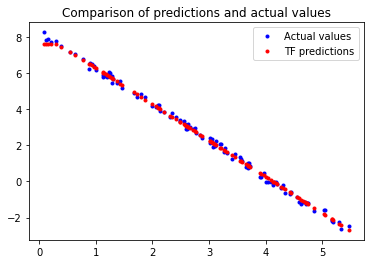

In [ ]:
# Calculate and print the loss on our test dataset
test_loss, test_mae = model_1.evaluate(x_test, y_test)

# Make predictions based on our test dataset
y_test_pred = model_1.predict(x_test)

# Graph the predictions against the actual values
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual values')
plt.plot(x_test, y_test_pred, 'r.', label='TF predictions')
plt.legend()
plt.show()

The graph seems to be pretty accurate compared to the actual values. The model has been well trained.

# Learning by doing: Your turn
Lets start a new process of creating a model from raw data to the refinement of a trained predictive model.
You will be require to copy and paste the code from the previous example and make new decisions based on the new parameters.

### Setup Environment



In [ ]:
# TensorFlow is an open source machine learning library


# Keras is TensorFlow's high-level API for deep learning

# Numpy is a math library

# Pandas is a data manipulation library 

# Matplotlib is a graphing library

# Math is Python's math library

#io is a library to import datasets


###Dataset

In [ ]:
# Copying raw data from github dataset file
#url1 = 'https://raw.githubusercontent.com/hewp84/tinyml/main/datasets/squareroot.csv'
#df is the variable where the data is stored
df1 = pd.read_csv(#write the variable that contains the url where the dataset is stored)
df1

,x,y,ys
0,0.00,0.000000,0.023338
1,0.01,0.100000,0.244941
2,0.02,0.141421,0.148944
3,0.03,0.173205,0.197751
4,0.04,0.200000,0.332901
...,...,...,...
595,5.95,2.439262,2.494503
596,5.96,2.441311,2.534302
597,5.97,2.443358,2.508055
598,5.98,2.445404,2.511347


Now lets shuffle and relabel the dataset

In [ ]:
#Randomizes the dataset
df1 = df1.sample(frac = 1)
# Sample Counts the sample size
sample = len(df1.index)
#Stores in simple variables the column lists from the dataset
x_values = df1['x']
y_values_0 = df1['y']
y_values = df1['ys']

###Split the data
Split the dataset in three sub data sets:

Training set

Validation set

Test set

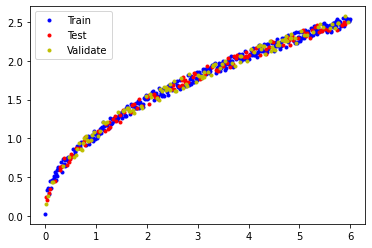

In [ ]:
# We'll use 60% of our data for training and 20% for testing. The remaining 20%
# will be used for validation. Calculate the indices of each section.
TRAIN_SPLIT =  int(# percentage of training * sample size)
TEST_SPLIT = int(0.2 * sample + TRAIN_SPLIT)

# Use np.split to chop our data into three parts.
# The second argument to np.split is an array of indices where the data will be
# split. We provide two indices, so the data will be divided into three chunks.
x_train, x_test, x_validate = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

# Double check that our splits add up correctly
assert (x_train.size + x_validate.size + x_test.size) ==  sample

# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.legend()
plt.show()


###Develop and train the model

In [ ]:
# We'll use Keras to create a simple model architecture
model_1 = tf.keras.Sequential()

# Try experimenting a different amount of neurons to check how the model is trained. Right now is configured in 8.
model_1.add(keras.layers.Dense(8, activation='relu', input_shape=(1,)))

# Final layer is a single neuron, since we want to output a single value
model_1.add(keras.layers.Dense(1))

# Compile the model using the standard 'adam' optimizer and the mean squared error or 'mse' loss function for regression.
model_1.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Try different iteration on epochs and see how it affects the model training
history_1 = model_1.fit(x_train, y_train, epochs=500, batch_size=64,
                        validation_data=(x_validate, y_validate))

Epoch 1/500
6/6 [==============================] - 0s 27ms/step - loss: 5.7907 - mae: 2.2397 - val_loss: 5.2472 - val_mae: 2.1469
Epoch 2/500
6/6 [==============================] - 0s 6ms/step - loss: 5.1170 - mae: 2.1113 - val_loss: 4.6510 - val_mae: 2.0249
Epoch 3/500
6/6 [==============================] - 0s 7ms/step - loss: 4.5272 - mae: 1.9889 - val_loss: 4.0980 - val_mae: 1.9044
Epoch 4/500
6/6 [==============================] - 0s 7ms/step - loss: 3.9862 - mae: 1.8698 - val_loss: 3.5947 - val_mae: 1.7875
Epoch 5/500
6/6 [==============================] - 0s 6ms/step - loss: 3.4810 - mae: 1.7521 - val_loss: 3.1456 - val_mae: 1.6759
Epoch 6/500
6/6 [==============================] - 0s 6ms/step - loss: 3.0324 - mae: 1.6398 - val_loss: 2.7443 - val_mae: 1.5692
Epoch 7/500
6/6 [==============================] - 0s 6ms/step - loss: 2.6348 - mae: 1.5328 - val_loss: 2.3845 - val_mae: 1.4664
Epoch 8/500
6/6 [==============================] - 0s 6ms/step - loss: 2.2828 - mae: 1.4306 - va

###Check metrics

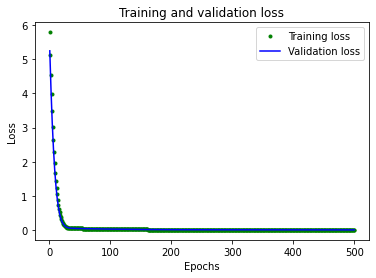

In [ ]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
train_loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#@title How well is your model approximating to the dataset? 

text = '' #@param {type:"string"}

print(text)

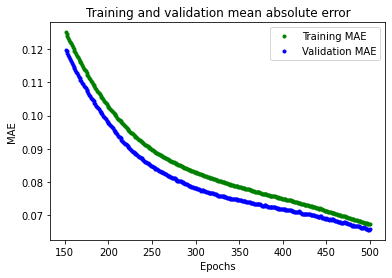

In [ ]:
# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
train_mae = history_1.history['mae']
val_mae = history_1.history['val_mae']

plt.plot(epochs[SKIP:], train_mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

4/4 [==============================] - 0s 4ms/step - loss: 0.0085 - mae: 0.0748


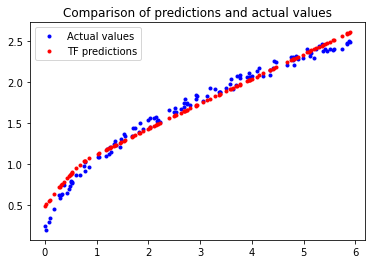

In [ ]:
# Calculate and print the loss on our test dataset
test_loss, test_mae = model_1.evaluate(x_test, y_test)

# Make predictions based on our test dataset
y_test_pred = model_1.predict(x_test)

# Graph the predictions against the actual values
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual values')
plt.plot(x_test, y_test_pred, 'r.', label='TF predictions')
plt.legend()
plt.show()

If your model is still not accurate, try adding an extra layer of neurons and try it again

# Challenge
Try to develop a model for a dataset with a cosine-wise data series

In [ ]:
# Copying raw data from github dataset file
#url2 = 'https://raw.githubusercontent.com/hewp84/tinyml/main/datasets/cosine.csv'
#df is the variable where the data is stored
df2 = pd.read_csv(#write the variable that contains the url where the dataset is stored)
df2

In [ ]:
#Your code goes here









#